In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math, datetime, time, random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder , label_binarize

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('C://Users//Dazza//Downloads//titanic//train.csv')
test = pd.read_csv('C://Users//Dazza//Downloads//titanic//test.csv')
gender_submission = pd.read_csv('C://Users//Dazza//Downloads//titanic//gender_submission.csv')
combine = [train,test]

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.shape , test.shape , gender_submission.shape , train['Cabin'].isnull().sum()

((891, 12), (418, 11), (418, 2), 687)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Name'].nunique()

891

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


male      577
female    314
Name: Sex, dtype: int64


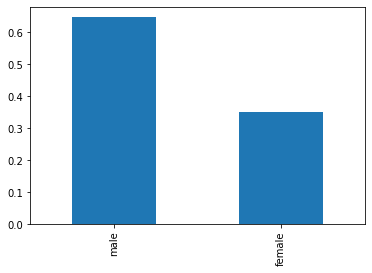

In [11]:
train['Sex'].value_counts(normalize=True).plot.bar()
print(train.Sex.value_counts())

In [12]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allen, Miss. Elisabeth Walton",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [13]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = 
False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index = 
False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[['Parch','Survived']].groupby(['Parch'], as_index = 
False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


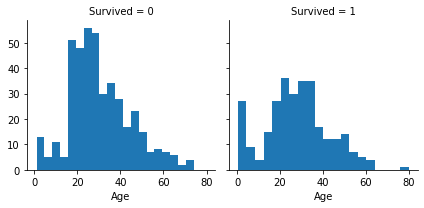

In [16]:
g  = sns.FacetGrid(train, col = 'Survived')
g.map (plt.hist, 'Age', bins = 20 )

C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


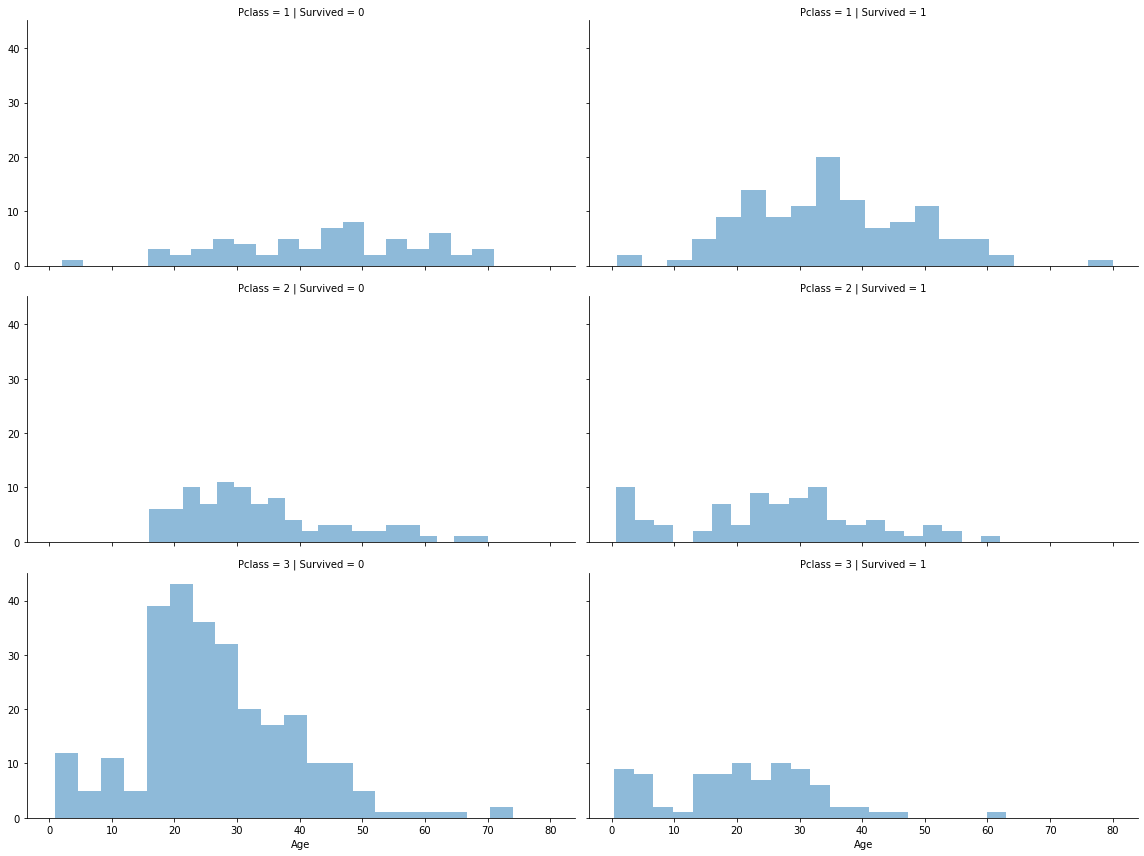

In [17]:
g = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 4, aspect = 2)
g.map(plt.hist, 'Age', alpha= .5 , bins = 20)


C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


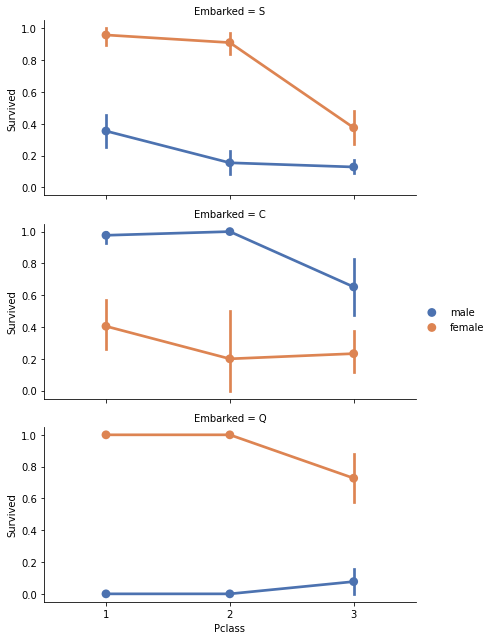

In [18]:
grid = sns.FacetGrid(train, 'Embarked' , size =3 , aspect = 2 )
grid.map(sns.pointplot, 'Pclass','Survived', 'Sex', palette = 'deep'  )
grid.add_legend()

C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


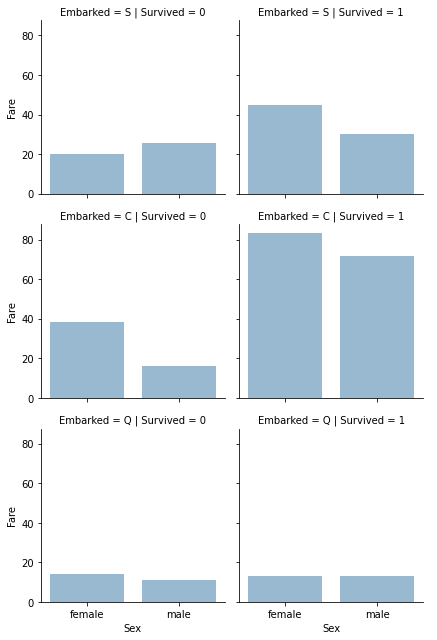

In [19]:
grid = sns.FacetGrid(train, row = 'Embarked', col = 'Survived', size = 3, aspect=1)
grid.map(sns.barplot, 'Sex' , 'Fare', alpha= .5 , ci=None)
grid.add_legend()

In [20]:
train = train.drop(['Ticket','Cabin'], axis =1 )
test = test.drop(['Ticket','Cabin'], axis =1 )
combine = [train,test]

combine[0].shape

(891, 10)

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [22]:
train.reset_index
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Major',\
                                            'Lady','Major','Rev','Sir'],'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

In [24]:
train[['Title','Survived']].groupby(['Title'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [25]:
title_mapping = {"Mr":1,"Miss":2, "Mrs":3, "Master":4,"Rare":5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
train = train.drop(['Name'], axis=1)
train = train.drop(['PassengerId'], axis=1)

In [27]:
test = test.drop(['Name'], axis = 1)

In [28]:
combine = [test,train]

In [29]:
for dataset in combine:
    dataset['Sex']= dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [30]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


C:\Users\Dazza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001EC9F9C1198>>

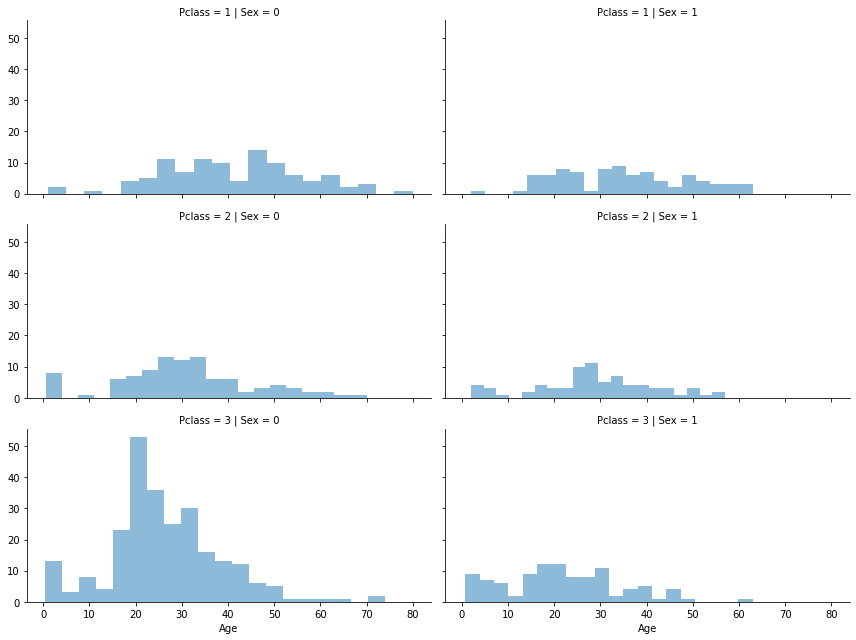

In [31]:
grid = sns.FacetGrid(train,row ='Pclass',col= 'Sex', size = 3 , aspect =2)
grid.map(plt.hist, 'Age',alpha=.5, bins=20)
grid.add_legend

In [32]:
guess_ages = np.zeros((2,3))

In [33]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) *0.5
    
    for i in range (0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1), 'Age'] = guess_ages[i,j] 
    
    dataset['Age'] = dataset['Age'].astype(int)


In [34]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [35]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [36]:
train['AgeBand'] = pd.cut(train['Age'],5)

train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [37]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1,
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age']=2,
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age']=3,
    dataset.loc[(dataset['Age']>64),'Age']=4,            

In [38]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [39]:
train = train.drop('AgeBand',axis=1)

combine = (train,test)

train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [40]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp'] + dataset['Parch'] + 1
    
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize']==1),'IsAlone'] =1
    
train[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train = train.drop (['Parch'], axis = 1 )
train = train.drop (['SibSp'], axis = 1 )
train = train.drop (['FamilySize'], axis = 1 )
test = test.drop (['Parch'], axis = 1 )
test = test.drop (['SibSp'], axis = 1 )
test = test.drop (['FamilySize'], axis = 1 )

combine = [train,test]

In [43]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train.Embarked.dropna().mode()[0])

train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
    

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S":0,"C":1,"Q":2})

In [46]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [47]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [48]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [50]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


In [51]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
X_tes  = test.drop("PassengerId", axis=1).copy()
X.shape, y.shape, X_tes.shape

((891, 8), (891,), (418, 8))

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [53]:
model_params = {
    'log_reg':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,10,20]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,50,100]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'naive_bayes_gaussian':{
        'model':GaussianNB(),
        'params':{}
    },
    'k-neighbour':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,3,7,10]
        }
            
        },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        } 
    }
}

In [54]:
from  sklearn.model_selection import GridSearchCV

scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,y)
    scores.append({'model':model_name,'best_score':clf.best_score_,'best_params':clf.best_params_})
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,log_reg,0.809203,{'C': 1}
1,random_forest,0.806958,{'n_estimators': 50}
2,decision_tree,0.795735,{'criterion': 'entropy'}
3,naive_bayes_gaussian,0.764310,{}
4,k-neighbour,0.800224,{'n_neighbors': 7}
5,svm,0.814815,"{'C': 1, 'kernel': 'rbf'}"


In [55]:
svm = SVC(gamma='auto',C=10,kernel='rbf')
svm.fit(X,y)
Y_pred = svm.predict(X_tes)

In [56]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": Y_pred
})

In [57]:
submission.to_csv("submission.csv",index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,4

In [59]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [61]:
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=70,max_depth=5,subsample=0.8,colsample_bytree=0.8,
                        objective='binary:logistic',seed=27)
xgb_clf.fit(X_train,y_train,eval_metric = 'auc')

#Predicting train 
pred = xgb_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred))


0.8156424581005587


In [62]:
xgb_Y_pred = xgb_clf.predict(X_tes)

submission_xgb = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": xgb_Y_pred
})

submission_xgb.to_csv("submission_xgb.csv",index=False)
submission_xgb.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [63]:
target = 'Survived'
IDcol = 'PassengerId'

In [64]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4f" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %.4f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob))
                
   

In [65]:
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train, predictors)


Model Report
Accuracy : 0.8541
AUC Score (Train): 0.9123


In [66]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.8, tree_metho

In [67]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8731575527915775)

In [68]:
param_test1 = {
    'max_depth':[1,2,3],
    'min_child_weight':[1,2,3,4,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 2}, 0.8739013987217253)

In [69]:
param_test1 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'gamma': 0.0}, 0.8739013987217253)

In [70]:
param_test1 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10 for i in range(6,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.8741049926515917)

In [71]:
param_test1 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100 for i in range(75,100,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.8741049926515917)

In [72]:
param_test1 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'reg_alpha': 1e-05}, 0.8739013987217253)

In [73]:
param_test1 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.9,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.best_params_, gsearch1.best_score_

({'reg_alpha': 0.01}, 0.8741560155628412)

In [75]:
predictors = [x for x in train.columns if x not in [target]]
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=140,
        max_depth=3,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.9,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27,
        reg_alpha=0.01)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.8418
AUC Score (Train): 0.8940


In [78]:
xgb_Y_tuned = xgb3.predict(X_tes)

submission_xgb1 = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": xgb_Y_tuned
})

submission_xgb1.to_csv("submission_xgb_tuned.csv",index=False)
submission_xgb1.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
